In [1]:

import pandas as  pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dataset=pd.read_csv(r"C:\Users\HP\Downloads\new folder\Salary_Data.csv")

In [3]:
dataset

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [4]:
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values


In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=0)

In [6]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [7]:
y_pred=regressor.predict(x_test)

In [8]:
comparision=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
print(comparision)

   Actual      Predicted
0   37731   40748.961841
1  122391  122699.622956
2   57081   64961.657170
3   63218   63099.142145
4  116969  115249.562855
5  109431  107799.502753


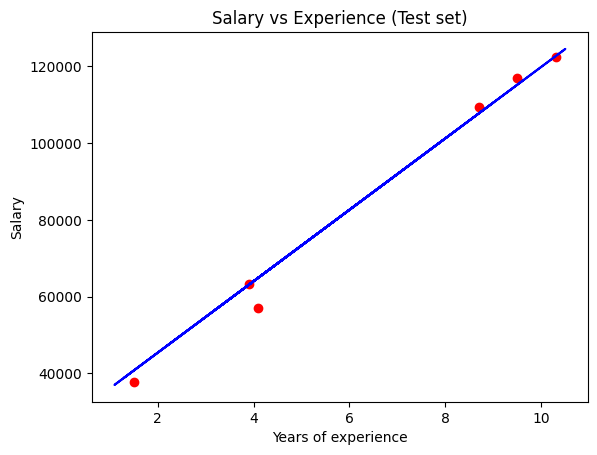

In [9]:
plt.scatter(x_test,y_test,color='red')
plt.plot(x_train,regressor.predict(x_train),color='blue')
plt.title("Salary vs Experience (Test set)")
plt.xlabel("Years of experience")
plt.ylabel("Salary")
plt.show()


In [10]:
m=regressor.coef_
print(m)

c=regressor.intercept_
print(c)

y_12=m*12+c
print(y_12)

y_20=m*20+c
print(y_20)

y_10=m*10+c
print(y_10)


[9312.57512673]
26780.09915062818
[138531.00067138]
[213031.60168521]
[119905.85041792]


In [11]:
bias=regressor.score(x_train,y_train)
print(bias)

variance=regressor.score(x_test,y_test)
print(variance)


0.9411949620562126
0.988169515729126


In [12]:
#stats in regression ml model

In [13]:
dataset.mean()
dataset['Salary'].mean()
dataset.median()
dataset['Salary'].median()
dataset['Salary'].mode()
dataset.var()
dataset.std()


YearsExperience        2.837888
Salary             27414.429785
dtype: float64

In [14]:
from scipy.stats import variation

In [15]:
variation(dataset.values)
variation(dataset['Salary'])

dataset.corr()

dataset['Salary'].corr(dataset['YearsExperience'])

np.float64(0.9782416184887598)

In [16]:

# Skewness----------------

In [17]:
dataset.skew()
dataset['Salary'].skew()

# Standard Error
dataset.sem()
dataset['Salary'].sem()

#Z-score----------
import scipy.stats as stats

dataset.apply(stats.zscore)
stats.zscore(dataset['Salary'])


array([-1.36011263, -1.10552744, -1.419919  , -1.20495739, -1.33978143,
       -0.71830716, -0.58815781, -0.79981746, -0.42881019, -0.69801306,
       -0.47433279, -0.74976858, -0.70662043, -0.70201994, -0.55250402,
       -0.29921736, -0.37004264,  0.26285865,  0.19885989,  0.66547573,
        0.58377993,  0.82623317,  0.93861127,  1.40274136,  1.24020308,
        1.09740238,  1.51986835,  1.3590738 ,  1.72102849,  1.70177321])

In [18]:
#SSR----------------------

In [21]:
y_mean=np.mean(y)
SSR=np.sum((y_pred-y_mean)**2)
print(SSR)

#SSE---------------------
y=y[0:6]
SSE=np.sum((y-y_pred)**2)
print(SSE)

#SST------------------------
mean_total=np.mean(dataset.values)
SST=np.sum((dataset.values-mean_total))
print(SST)

#R2----------------------
r_square= 1-(SSR/SST)
r_square



16210691641.91706
15274062883.943203
1.4551915228366852e-10


np.float64(-1.1139902471611892e+20)

In [23]:
from sklearn.metrics import mean_squared_error
train_mse=mean_squared_error(y_train,regressor.predict(x_train))
test_mse=mean_squared_error(y_test,y_pred)
print(train_mse)
print(test_mse)




36149670.11816131
12823412.298126549


In [24]:
import pickle

# Save the trained model to disk
filename = 'linear_regression_model.pkl'

# Open a file in write-binary mode and dump the model
with open(filename, 'wb') as file:
    pickle.dump(regressor, file)

print("Model has been pickled and saved as linear_regression_model.pkl")

Model has been pickled and saved as linear_regression_model.pkl


# The Dataset is ready for application